# COVID-19 in INDIA

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

Firstly, I  have using python language to do the coding and the analysis for COVID-19
1. pandas and numpy is used for dataframes, calculations and all.
2. Libraries such as matplotlib, plotly is used for the visualization purpose.


**Only the plotly output are shown in the covid19_project.pdf in the same repository, as plotly output is not supported in github.
While the rest output and analysis are there in this jupyter notebook**

To start-off the project, we need to import some necessary libraries which will be needed in our project

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from covid import Covid
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime
import seaborn as sns

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plotly.__version__

'4.9.0'

## COVID-19 Cases Date-wise

Here, you can view the number of Confirmed, Recovered, Deceased, Active cases on each Day.

In [232]:
pd.options.display.float_format = '{:,.1f}'.format
df=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')
df.rename(columns={'Daily Confirmed':'Confirmed_Cases','Daily Recovered':'Recovered_Cases','Daily Deceased':'Deceased_Cases'},inplace=True)
df['Active_Cases']=df['Confirmed_Cases']-(df['Recovered_Cases']+df['Deceased_Cases'])
print('\n')
abc=df.iloc[:,[0,1,3,5,7]]
abc

,Date,Confirmed_Cases,Recovered_Cases,Deceased_Cases,Active_Cases
0,30 January,1,0,0,1
1,31 January,0,0,0,0
2,01 February,0,0,0,0
3,02 February,1,0,0,1
4,03 February,1,0,0,1
...,...,...,...,...,...
196,13 August,64141,54776,1006,8359
197,14 August,65610,56920,989,7701
198,15 August,63986,53116,952,9918
199,16 August,58096,57404,960,-268


## Daily COVID-19 Tracker (Graph 1)

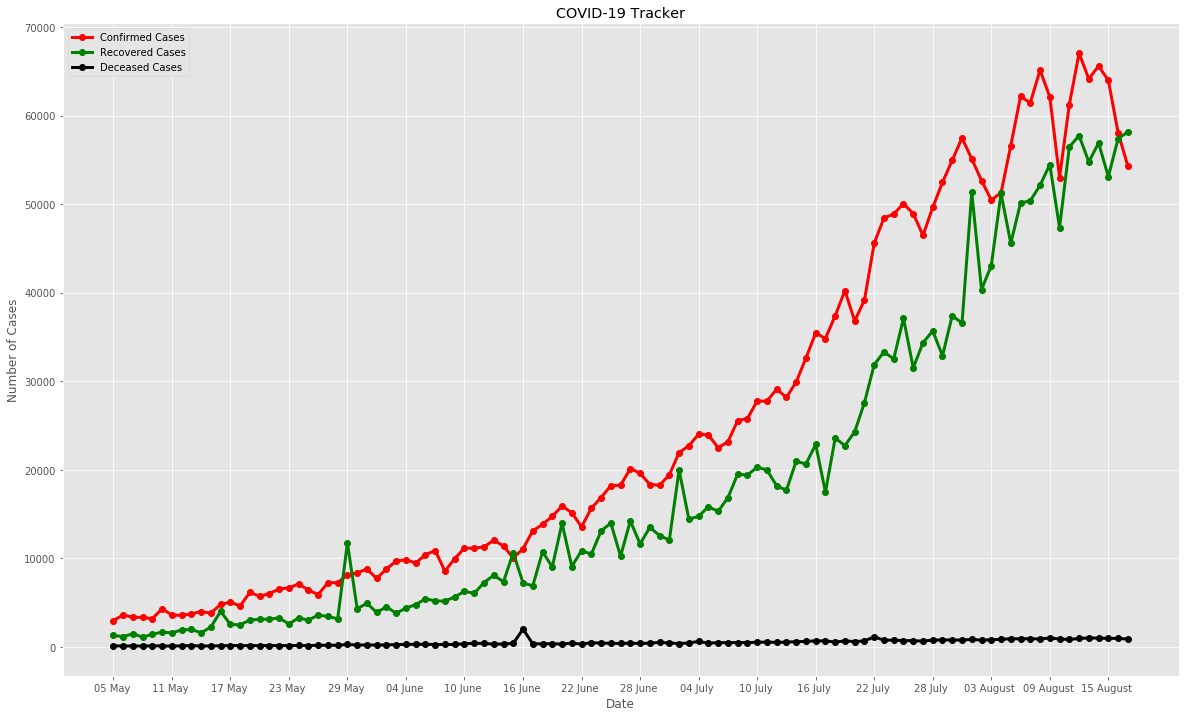

In [233]:
plt.style.use('ggplot')
plt.figure(figsize=(20,12))
df=df.tail(105)
xdate = ['21 April', '4 May', '18 May', '1 June', '1 July']
color1 = ['#B6B10D', '#32A8A4', '#298315', '#CF0FCC', '#B20B4D']
lockdown = ['Lockdown-2', 'Lockdown-3', 'Lockdown-4', 'Lockdown-5', 'Lockdown-6']


plt.plot(df.Date,df.Confirmed_Cases,linewidth=3,linestyle='-',marker='o',color='red',label='Confirmed Cases')
plt.plot(df.Date, df.Recovered_Cases, linewidth=3,linestyle='-', marker='o', color='green',label='Recovered Cases')
plt.plot(df.Date, df.Deceased_Cases,linewidth=3, linestyle='-', marker='o', color='black',label='Deceased Cases')
plt.title('COVID-19 Tracker')



plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(df.Date[::6])
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

Here, you can see the COVID-19 Tracker for the last 3 and a half month in India

In [234]:
df=df.tail(105)
fig=make_subplots(rows=2,cols=2,shared_xaxes=True)

data1=go.Bar(x=df['Date'],y=df['Confirmed_Cases'],name='Confirmed Cases')
data2=go.Bar(x=df['Date'],y=df['Recovered_Cases'],name='Recovered Cases')
data3=go.Bar(x=df['Date'],y=df['Active_Cases'],name='Active Cases')
data4=go.Bar(x=df['Date'],y=df['Deceased_Cases'],name='Deceased Cases')

fig.add_trace(data3, 1, 1)
fig.add_trace(data1, 1, 2)
fig.add_trace(data2, 2, 1)
fig.add_trace(data4, 2, 2)
fig.update_layout(title_text='Daily COVID-19 Tracker')
fig.show()

#### The output is shown in the covid19_project.pdf as the plotly output is not supported in github

## COVID-19 Tracker (Graph 2)

The below graph is a scatter plot along with lines which comprises of daily cases in India. This graph helps to properly track the number of cases which makes it easy to find when the cases were high or low. It also tells the case trend in India. 

In [235]:
graph1 = go.Scatter(x=df['Date'],y=df['Confirmed_Cases'],name='Confirmed Cases',mode='markers+lines')
graph2 = go.Scatter(x=df['Date'], y=df['Recovered_Cases'], name='Recovered Cases',mode='markers+lines')
graph3 = go.Scatter(x=df['Date'], y=df['Deceased_Cases'], name='Deceased Cases',mode='markers+lines')
data=[graph3,graph1,graph2]
layout=go.Layout(title='COVID-19 Cases Tracker')
figure=go.Figure(data=data,layout=layout)
figure.update_layout(
            title={
                'y': 0.9,
                'x': 0.5,
                'xanchor':'center',
                'yanchor':'top'
            }
        )
figure.show()

#### The output is shown in the covid19_project.pdf as the pyplot output is not supported in github

By looking at the chart, we can see that the number of Confirmed Cases in India is increasing Day by Day but the good thing is that the number of Recovered Cases is also increasing which is a sense of relief. Also, we can see that the number of deceased 
cases is not having any spike which means there is a slight difference in the number of cases betweem any two days

## COVID-19 Donut Chart

The Donut Chart is divided into three section- Recovered Cases, Active Cases, Deceased Cases. The chart helps us to determine how much percentage of a particular type of cases are there in present in comparison of the other types of cases.  

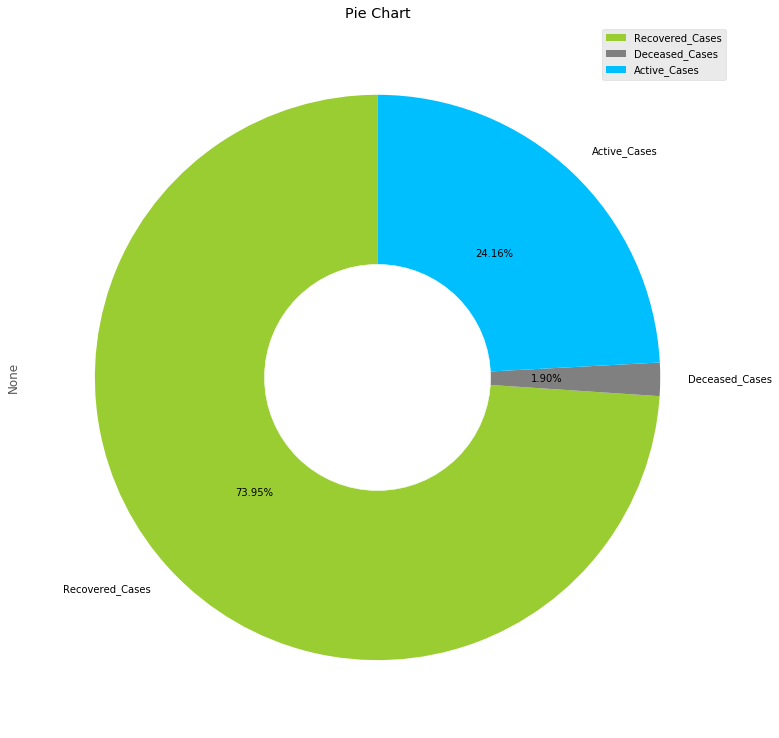

In [236]:
df=df.iloc[:,[3,5,7]]
colors=['yellowgreen','Grey','deepskyblue']
plt.figure(figsize=(26,13))
df.sum().plot(kind='pie',autopct='%.2f%%',startangle=90,y='',colors=colors)
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.title('Pie Chart')
plt.show()



In [237]:
colors = ['grey', 'navyblue', 'greenyellow']
names=['Deceased_Cases','Active Cases','Recovered Cases']
pie_graph=go.Pie(values=[df['Deceased_Cases'].sum(),df['Active_Cases'].sum(),df['Recovered_Cases'].sum()],labels=names,
                         hole=.2)
layout=go.Layout(title='COVID-19 Donut chart',)
figure=go.Figure(data=pie_graph,layout=layout)
figure.update_traces(textinfo='percent+label',textfont_size=18,marker=dict(colors=colors,line=dict(color='#000000',width=4)))
figure.show()

#### The output is shown in the covid19_project.pdf as the plotly output is not supported in github

Currently, the recovery percentage is more than the Active and Deceased percentage.

## STATE wise COVID-19 Cases

So, now we will see COVID-19 cases state wise which will help us to find the total number of cases in each state.

In [238]:
state_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
state_df['Date'] = state_df.Date.apply(lambda x: pd.to_datetime(x).strftime('%d-%m-%Y'))
state_df.rename(columns={'AN': 'Andaman Nicobar', 'AP': 'Andhra Pradesh', 'AR': 'Arunachal Pradesh', 'AS': 'Assam',
                             'BR': 'Bihar', 'CH': 'Chandigarh', 'CT': 'Chattisgarh', 'DD': 'Daman & Diu', 'DL': 'Delhi',
                             'GA': 'Goa', 'GJ': 'Gujarat',
                             'HR': 'Haryana', 'HP': 'Himachal Pradesh', 'JK': 'Jammu And Kashmir', 'KA': 'Karnataka',
                             'KL': 'Kerela',
                             'LA': 'Ladakh', 'MP': 'Madhya Pradesh', 'MH': 'Maharashtra', 'MN': 'Manipur',
                             'ML': 'Meghalaya',
                             'MZ': 'Mizoram', 'NL': 'Nagaland', 'OR': 'Orissa', 'PY': 'Puducherry', 'PB': 'Punjab',
                             'RJ': 'Rajasthan',
                             'SK': 'Sikkim', 'TN': 'Tamil Nadu', 'TG': 'Telegana', 'TR': 'Tripura',
                             'UP': 'Uttar Pradesh',
                             'UT': 'Uttarakhand',
                             'WB': 'West Bengal', 'TT': 'Total'}, inplace=True)

top_affected=state_df.loc[state_df['Status']=='Confirmed']
top_affected=top_affected.iloc[:,3:-1]
top_affected=top_affected.reset_index()
top_affected.drop(['index'],axis=1,inplace=True)
confirmed=top_affected.sum(axis=0)
confirmed_df=pd.DataFrame(confirmed,columns=['Confirmed Cases'])

recovered_state=state_df.loc[state_df['Status']=='Recovered']
recovered_state=recovered_state.iloc[:,3:-1]
recovered_state=recovered_state.reset_index()
recovered_state.drop(['index'],axis=1,inplace=True)
recovered=recovered_state.sum(axis=0)
recovered_df=pd.DataFrame(recovered,columns=['Recovered Cases'])

final_part1=confirmed_df.merge(recovered_df,left_index=True,right_index=True)

deceased_state = state_df.loc[state_df['Status'] == 'Deceased']
deceased_state = deceased_state.iloc[:, 3:-1]
deceased_state = deceased_state.reset_index()
deceased_state.drop(['index'], axis=1, inplace=True)
deceased = deceased_state.sum(axis=0)
deceased_df = pd.DataFrame(deceased, columns=['Deceased Cases'])

final_df=final_part1.merge(deceased_df,left_index=True,right_index=True)
final_df['Active Cases']=final_df['Confirmed Cases']-(final_df['Recovered Cases']+final_df['Deceased Cases'])
final_df.index.name='State'
final_df1=final_df.sort_values(by='Confirmed Cases',ascending=False)
final_df1['Recovered Ratio(in %)']=(final_df1['Recovered Cases']/final_df1['Confirmed Cases'])*100
final_df1['Active Ratio(in %)']=(final_df1['Active Cases']/final_df1['Confirmed Cases'])*100
final_df1['Deceased Ratio(in %)']=(final_df1['Deceased Cases']/final_df1['Confirmed Cases'])*100
final_df1=final_df1.rename(columns={'JH':'Jharkhand'})
final_df1.replace(np.nan,0,inplace=True)


final_df1

,Confirmed Cases,Recovered Cases,Deceased Cases,Active Cases,Recovered Ratio(in %),Active Ratio(in %),Deceased Ratio(in %)
State,,,,,,,
Maharashtra,604358,428514,20264,155580,70.9,25.7,3.4
Tamil Nadu,343945,283937,5886,54122,82.6,15.7,1.7
Andhra Pradesh,296609,209100,2732,84777,70.5,28.6,0.9
Karnataka,233283,148563,4078,80642,63.7,34.6,1.7
Uttar Pradesh,158216,104808,2515,50893,66.2,32.2,1.6
Delhi,153367,138301,4214,10852,90.2,7.1,2.7
West Bengal,119578,89703,2473,27402,75.0,22.9,2.1
Bihar,106618,76706,542,29370,71.9,27.5,0.5
Telegana,92255,70132,703,21420,76.0,23.2,0.8


In [239]:
fig=make_subplots(rows=2,cols=2,shared_xaxes=True)
barchart1=go.Bar(x=final_df.index,y=final_df['Confirmed Cases'],name='Confirmed Cases')
barchart2=go.Bar(x=final_df.index,y=final_df['Recovered Cases'],name='Recovered Cases')
barchart3=go.Bar(x=final_df.index,y=final_df['Deceased Cases'],name='Deceased Cases')
barchart4 = go.Bar(x=final_df.index, y=final_df['Active Cases'], name='Active Cases')
layout=go.Layout(title='Total Confirmed Cases in Each State')
fig.add_trace(barchart4,1,1)
fig.add_trace(barchart1, 1, 2)
fig.add_trace(barchart2, 2, 1)
fig.add_trace(barchart3, 2, 2)
fig.update_layout( title_text="COVID-19 case details State wise")
fig.show()


#### The output is shown in the covid19_project.pdf as the plotly output is not supported in github

## COVID-19 Cases/million

So, now we will see the number of Confirmed Cases per million(i.e. 10 Lakh) population. The data is arranged in such a manner that States having the highest Cases/million ratio are on the top i.e the data is arranged in a descending manner.

In [240]:
population = pd.read_excel('Indian States Population and Area.xlsx')
df_population = pd.merge( final_df1,population, on='State')
df_population.sort_values(by='Confirmed Cases',ascending=False,inplace=True)
df_population.reset_index(inplace=True)
df_population.drop(['index'], axis=1, inplace=True)
df_population['Cases/million']=(df_population['Confirmed Cases']/df_population['Population'])*1000000
df_population.sort_values(by='Cases/million',ascending=False,inplace=True)
df_population

,State,Confirmed Cases,Recovered Cases,Deceased Cases,Active Cases,Recovered Ratio(in %),Active Ratio(in %),Deceased Ratio(in %),Population,Area (per sq km),Cases/million
9,Assam,79566,56735,201,22630,71.3,28.4,0.3,6755448,78438,"11,778.0"
23,Ladakh,1966,1368,14,584,69.6,29.7,0.7,210156,59146,"9,355.0"
15,Goa,11994,8058,111,3825,67.2,31.9,0.9,1587012,3702,"7,557.6"
5,Delhi,153367,138301,4214,10852,90.2,7.1,2.7,21763471,1483,"7,047.0"
16,Puducherry,8031,4627,114,3290,57.6,41.0,1.4,1286189,490,"6,244.0"
2,Andhra Pradesh,296609,209100,2732,84777,70.5,28.6,0.9,49145456,162970,"6,035.3"
0,Maharashtra,604358,428514,20264,155580,70.9,25.7,3.4,114063427,307713,"5,298.4"
1,Tamil Nadu,343945,283937,5886,54122,82.6,15.7,1.7,72344821,130060,"4,754.2"
3,Karnataka,233283,148563,4078,80642,63.7,34.6,1.7,62462743,191791,"3,734.8"
20,Nagaland,3455,1530,7,1918,44.3,55.5,0.2,1262729,16579,"2,736.1"


## States with maximum Confirmed Cases

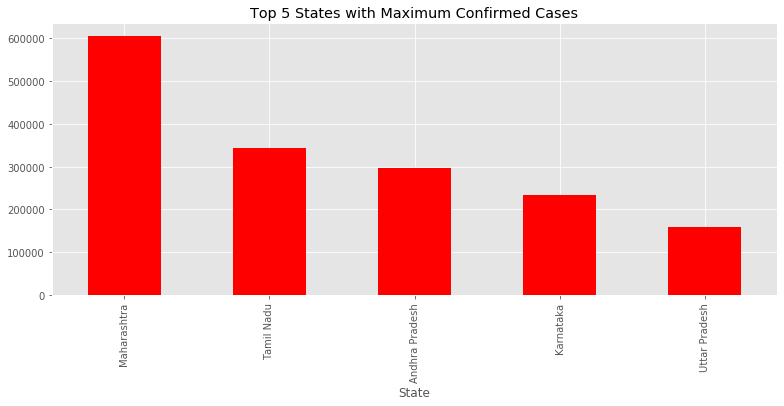

In [241]:
a=final_df.sort_values(by='Confirmed Cases',ascending=False)
a=a.head(5)
plt.figure(figsize=(13,5))
plt.title('Top 5 States with Maximum Confirmed Cases')
a['Confirmed Cases'].plot(kind='bar',color='red')

On inspecting the above chart,currently Maharashtra is having the highest number of Confirmed Cases which has crossed 5 Lakhs Cases. Maharashtra is being followed by Tamil Nadu which is having more than 3 lakhs Cases and Karnataka and Delhi having more than 2.3 Lakhs and 1.5 Lakhs cases respectively.

## States with Maximum Recovered Cases

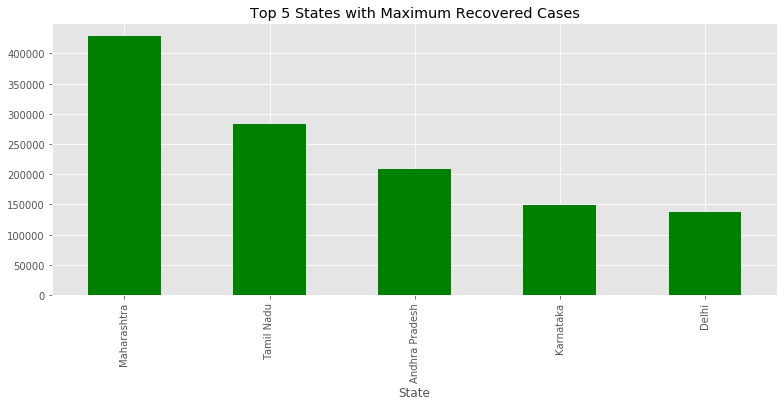

In [242]:
a=final_df.sort_values(by='Recovered Cases',ascending=False)
a=a.head(5)
plt.figure(figsize=(13,5))
plt.title('Top 5 States with Maximum Recovered Cases')
a['Recovered Cases'].plot(kind='bar',color='green')

There is a slight change in the order of States having highest Recovery cases as compared to Confirmed Cases. As we saw earlier that Maharashtra had the Highest Confirmed Cases, simultaneously it also has the highest Recovery rate than all the other states

## States with maximum Deceased Cases

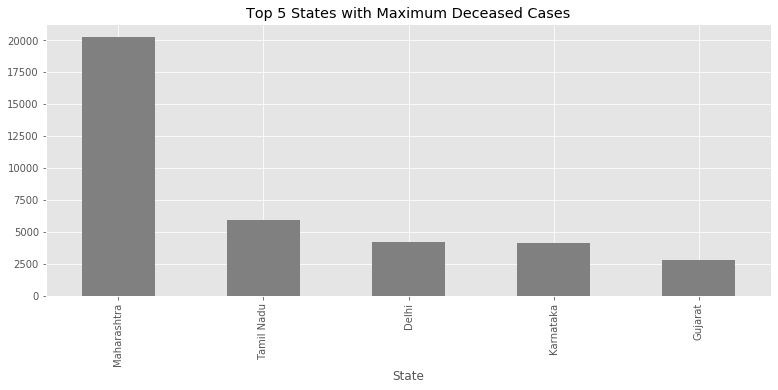

In [243]:
a=final_df.sort_values(by='Deceased Cases',ascending=False)
a=a.head(5)
plt.figure(figsize=(13,5))
plt.title('Top 5 States with Maximum Deceased Cases')
a['Deceased Cases'].plot(kind='bar',color='grey')

In the above chart, we can see that Maharashtra is have the highest number of Deceased cases as compared to the other states in India.

## States with maximum Active Cases

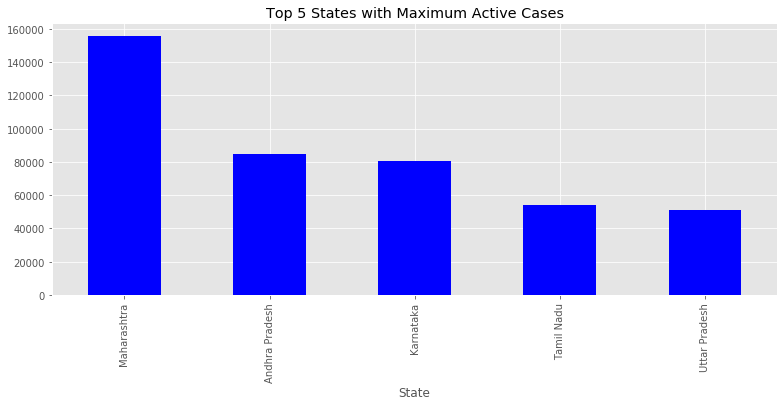

In [244]:
a=final_df.sort_values(by='Active Cases',ascending=False)
a=a.head(5)
plt.figure(figsize=(13,5))
plt.title('Top 5 States with Maximum Active Cases')
a['Active Cases'].plot(kind='bar',color='blue')

So, we saw from the above 4 graphs that Maharashtra is currently on the top as compared with other states from all point of view.

You can also view the number of cases in the particular state on a specific date.

In [245]:
def view_date_wise(date,state_name):
    state_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
    state_df['Date'] = state_df.Date.apply(lambda x: pd.to_datetime(x).strftime('%d-%m-%Y'))
    state_df.rename(
        columns={'AN': 'Andaman Nicobar', 'AP': 'Andhra Pradesh', 'AR': 'Arunachal Pradesh', 'AS': 'Assam',
                 'BR': 'Bihar', 'CH': 'Chandigarh', 'CT': 'Chattisgarh', 'DD': 'Daman & Diu', 'DL': 'Delhi',
                 'GA': 'Goa', 'GJ': 'Gujarat',
                 'HR': 'Haryana', 'HP': 'Himachal Pradesh', 'JK': 'Jammu And Kashmir', 'KA': 'Karnataka',
                 'KL': 'Kerela',
                 'LA': 'Ladakh', 'MP': 'Madhya Pradesh', 'MH': 'Maharashtra', 'MN': 'Manipur', 'ML': 'Meghalaya',
                 'MZ': 'Mizoram', 'NL': 'Nagaland', 'OR': 'Orissa', 'PY': 'Puducherry', 'PB': 'Punjab',
                 'RJ': 'Rajasthan',
                 'SK': 'Sikkim', 'TN': 'Tamil Nadu', 'TG': 'Telegana', 'TR': 'Tripura', 'UP': 'Uttar Pradesh',
                 'UT': 'Uttarakhand',
                 'WB': 'West Bengal', 'TT': 'India'}, inplace=True)
    date_particular=state_df.loc[state_df['Date']==date]
    state_particular=date_particular.loc[:,['Status',state_name,'India']]
    state_particular.reset_index(inplace=True)
    state_particular.drop('index',inplace=True,axis=1)
    return state_particular

You just need to add the Date in dd-mm-yyyy format and the name of the State in view_date_wise() function.
                               
For example: view_date_wise(date,name of the state)

In [246]:
view_date_wise('29-07-2020','Maharashtra')

,Status,Maharashtra,India
0,Confirmed,9211,52479
1,Recovered,7478,32886
2,Deceased,298,775


You can see the number of Cases in India and Maharashtra on that particular date.

In [247]:
def state_cases(state_name):
    final_cases_df=pd.DataFrame()
    ccases=state_df.loc[state_df['Status'] == 'Confirmed']
    ccases=ccases[['Date', state_name]]
    final_cases_df=final_cases_df.append(ccases)

    rcases=state_df.loc[state_df['Status'] == 'Recovered']
    rcases=rcases[['Date', state_name]]
    final_cases_df=pd.merge(final_cases_df,rcases,on='Date')


    dcases=state_df.loc[state_df['Status'] == 'Deceased']
    dcases=dcases[['Date', state_name]]
    final_cases_df=pd.merge(final_cases_df,dcases,on='Date')
    final_cases_df.columns=['Date','Confirmed Cases','Recovered Cases','Deceased Cases']
    final_cases_df=final_cases_df.tail(10)
    final_cases_df.reset_index(inplace=True)
    final_cases_df.drop('index',axis=1,inplace=True)
    print('Last 10 days Case Data in ', state_name)
    return final_cases_df


Enter the Name of the State in state_cases() whose data you want to view

In [248]:
state_cases('Gujarat')

Last 10 days Case Data in  Gujarat


,Date,Confirmed Cases,Recovered Cases,Deceased Cases
0,08-08-2020,1101,1135,23
1,09-08-2020,1078,1311,25
2,10-08-2020,1056,1138,20
3,11-08-2020,1118,1140,23
4,12-08-2020,1152,977,18
5,13-08-2020,1092,1046,18
6,14-08-2020,1087,1083,15
7,15-08-2020,1094,1015,19
8,16-08-2020,1120,959,20
9,17-08-2020,1033,1083,15


As shown above, you can also view the the number of cases in the particular state for the last 10 days

# COVID-19 in WORLD

The below part of the project comprises of the number of cases in different countries of the world.
The Data has been sourced through a csv file whose link is added in the pd.read_csv() below.

In [249]:
def world_data(col,n):
    world_data_df = pd.read_csv(
        'https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/worldometer_data.csv')
    world_data_df.rename(columns={'TotalCases':'Confirmed','TotalDeaths':'Deceased','TotalRecovered':'Recovered'},inplace=True)
    world_data_df=world_data_df.replace('',np.nan).fillna(0)
    figure=px.bar(world_data_df.sort_values(by=col).tail(n),x=col,y='Country/Region',orientation='h',color='Continent',
                      text=col,width=900,color_discrete_sequence=px.colors.qualitative.Dark2)

    figure.update_layout(title='Top 15 Country with most '+col+' Cases in World',xaxis_title='',yaxis_title=''
                         ,yaxis_categoryorder='total ascending')
    figure.show()

## Countries with Most Confirmed Cases in World

In [250]:
world_data('Confirmed',15)

#### The output is shown in the covid19_project.pdf as the plotly output is not supported in github

## Countries with Most Recovered Cases in World

In [251]:
world_data('Recovered',15)

#### The output is shown in the covid19_project.pdf as the plotly output is not supported in github

## Countries with Most Deceased Cases in World

In [252]:
world_data('Deceased',15)

#### The output is shown in the covid19_project.pdf as the plotly output is not supported in github